# Online Shoppers Purchasing Intention Dataset Data Set 
---
The dataset consists of feature vectors belonging to 12,330 sessions.    
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

---
### 在這個資料集中，'Revenue'的欄位代表該位使用者最後是否有進行消費，將其用來作為classify
## Q:透過使用者在網頁瀏覽相關行為來判斷其是否進行消費

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection

In [2]:
train_data = pd.read_csv('online_shoppers_intention.csv', sep=',')

In [3]:
# checking the shape of the data
train_data.shape

(12330, 18)

### Partial introduction
* BounceRates:進入網頁後，未進行任何閱讀活動的比例
* ExitRates:進入網頁後，進行閱讀活動後才離開，計算在此頁面離開的比例
* PageValues:在完成交易之前所瀏覽的網頁數

In [5]:
# checking the head of the data

train_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
# see all optionos in each of the following column:
# month, operating system, browser, region, traffic type, visitor type 

monkey = train_data['Month'].value_counts().keys().tolist()
oskey = train_data['OperatingSystems'].value_counts().keys().tolist()
brkey = train_data['Browser'].value_counts().keys().tolist()
regkey = train_data['Region'].value_counts().keys().tolist()
trafkey = train_data['TrafficType'].value_counts().keys().tolist()
visitorkey = train_data['VisitorType'].value_counts().keys().tolist()
print("monkey:",monkey)
print("oskey:",oskey)
print("browserkey:",brkey)
print("regionkey:",regkey)
print("traffickey:",trafkey)
print("vistypekey:",visitorkey)

monkey: ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb']
oskey: [2, 1, 3, 4, 8, 6, 7, 5]
browserkey: [2, 1, 4, 5, 6, 10, 8, 3, 13, 7, 12, 11, 9]
regionkey: [1, 3, 4, 2, 6, 7, 9, 8, 5]
traffickey: [2, 1, 3, 4, 13, 10, 6, 8, 5, 11, 20, 9, 7, 15, 19, 14, 18, 16, 12, 17]
vistypekey: ['Returning_Visitor', 'New_Visitor', 'Other']


In [7]:
# describing the data

train_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## 更改dataframe 欄位資料
將**VisitorType**, **Weekend**, **Revenue**三行資料轉為數字型態   

其中**VisitorType**含有**Returning_Visitor**,**New_Visitor**,**Other**三種value，分別轉為0,1,2
**Weekend**和**Revenue**中為**True**跟**False**，分別轉為1,0

In [8]:
transformation_1 = {
    "Returning_Visitor":0,
    "New_Visitor":1,
    "Other":2
}
transformation_mon = {
    "Feb":2,
    "Mar":3,
    "May":5,
    "June":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
}
train_data['VisitorType'] = train_data['VisitorType'].map(transformation_1)
train_data['Month'] = train_data['Month'].map(transformation_mon)
train_data['Weekend'] = train_data['Weekend'].astype(int)
train_data['Revenue'] = train_data['Revenue'].astype(int)

In [9]:
#checking the NA values
train_data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
#checking the Null values in the dataset
train_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
train_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,0,0,0
1,0,0.000000,0,0.00,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,0,0,0
2,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,0,0,0
3,0,0.000000,0,0.00,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,0,0,0
4,0,0.000000,0,0.00,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,0,1,0
5,0,0.000000,0,0.00,19,154.216667,0.015789,0.024561,0.000000,0.0,2,2,2,1,3,0,0,0
6,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.4,2,2,4,3,3,0,0,0
7,1,0.000000,0,0.00,0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,2,1,5,0,1,0
8,0,0.000000,0,0.00,2,37.000000,0.000000,0.100000,0.000000,0.8,2,2,2,2,3,0,0,0
9,0,0.000000,0,0.00,3,738.000000,0.000000,0.022222,0.000000,0.4,2,2,4,1,2,0,0,0


* Construct train and test data

* 將前一萬筆資料作為訓練資料
* 剩餘做為測試資料
* 利用LogisticRegression來產生classifier

In [12]:
train = train_data[:10000]
test = train_data[10000:]

## 結果一、僅僅只是將data type為string的欄位更改為數字，沒有做其他操作所得到的結果

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

x_train = train.loc[:, train.columns != 'Revenue']
y_train = train['Revenue']
x_test = test.loc[:, test.columns != 'Revenue']
y_test = test['Revenue']
clf = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial').fit(x_train, y_train)

/home/cmw/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [14]:
pre_result = clf.predict(x_test).tolist()
print(classification_report(y_test, pre_result))
print(clf.score(x_test, y_test))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1863
           1       0.70      0.28      0.40       467

   micro avg       0.83      0.83      0.83      2330
   macro avg       0.77      0.63      0.65      2330
weighted avg       0.81      0.83      0.80      2330

0.8317596566523605


## 結果二、因為訓練資料集(train)中的True:False=1:6，嘗試以oversampling來平衡兩者的比例

In [50]:
#Original size of train
train.shape

(10000, 18)

In [38]:
Revenuegroups = train.groupby('Revenue')

In [43]:
TrueinTrain = Revenuegroups.get_group(1)
FalseinTrain = Revenuegroups.get_group(0)

In [48]:
newTrueinTrain = pd.concat([TrueinTrain, TrueinTrain, TrueinTrain, TrueinTrain, TrueinTrain, TrueinTrain])

In [51]:
train_2 = pd.concat([newTrueinTrain, FalseinTrain])

In [52]:
#New size of train
train_2.shape

(17205, 18)

In [53]:
x_train_2 = train_2.loc[:, train_2.columns != 'Revenue']
y_train_2 = train_2['Revenue']
clf = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial').fit(x_train_2, y_train_2)

/home/cmw/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [54]:
pre_result_2 = clf.predict(x_test).tolist()
print(classification_report(y_test, pre_result_2))
print(clf.score(x_test, y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1863
           1       0.57      0.68      0.62       467

   micro avg       0.83      0.83      0.83      2330
   macro avg       0.75      0.78      0.76      2330
weighted avg       0.85      0.83      0.84      2330

0.8347639484978541


## 討論
1. 和原資料集比較，precision的部分差不多，由於logistic regression在classify之前先行產生一函數來描述此資料集所對應的模型，若給予重複的資料，並不會對此函數產生太大的影響。
2. 在預測True和False的部分，前者的f1-score有明顯上升，而後者大致上持平，因此採用over sampling方式對於提升準確率有所助益。

## 結果三、觀察訓練資料集(train)中各個欄位相關程度來創造新的欄位，試著找出更具決定性的attribute

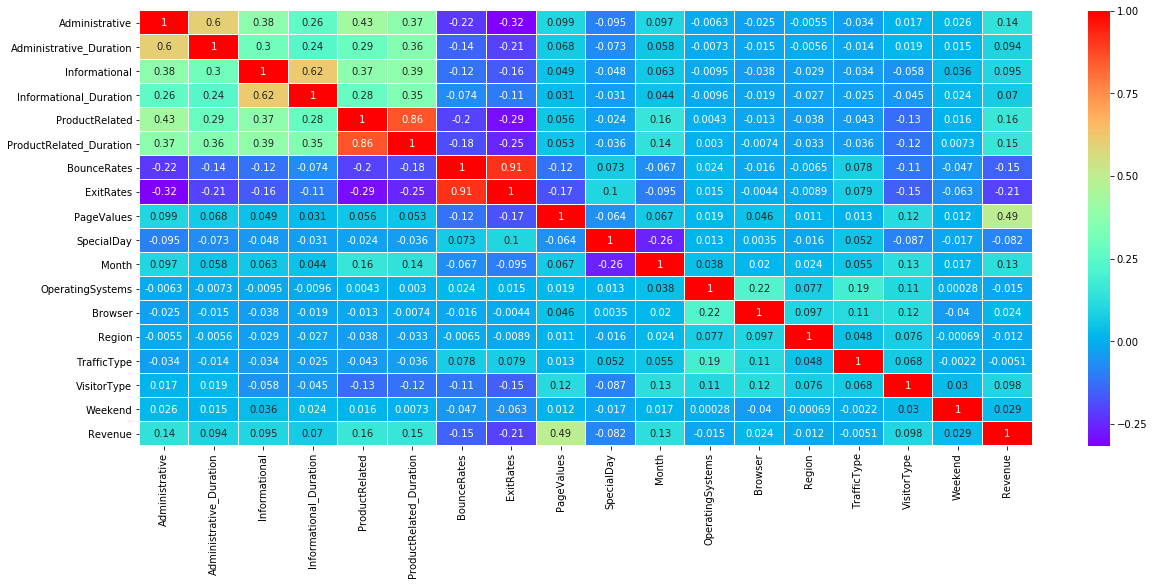

In [71]:
plt.figure(figsize=(20, 8))

foo = sns.heatmap(train_data.corr(), linewidths = 0.05, vmax = 1, annot=True, cmap='rainbow')